<a href="https://colab.research.google.com/github/tejasreejilla/credit-scoring-ml-model/blob/main/creditScoring_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


loading the dataset

In [ ]:
# Load the dataset
file_path = '/content/credit_scoring_dataset.csv'  # Update path if necessary
df = pd.read_csv(file_path)
# Display the first few rows of the dataset
print(df.head())

         Income  Age   Loan_Amount Credit_History Employment_Status  \
0  57450.712295   61  14329.914167           Good        Unemployed   
1  47926.035482   66  15073.440974           Good          Employed   
2  59715.328072   57  11075.508435            Bad          Employed   
3  72845.447846   28  18241.402169           Good          Employed   
4  46487.699379   20  14395.259257            Bad          Employed   

          Debt  Dependents  Risk  
0  6923.974378           1     0  
1  4525.976060           3     0  
2  6499.800479           3     0  
3  5558.535676           3     0  
4  3098.178541           0     0  


exploringthe dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             1000 non-null   float64
 1   Age                1000 non-null   int64  
 2   Loan_Amount        1000 non-null   float64
 3   Credit_History     1000 non-null   object 
 4   Employment_Status  1000 non-null   object 
 5   Debt               1000 non-null   float64
 6   Dependents         1000 non-null   int64  
 7   Risk               1000 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB
None
Income               0
Age                  0
Loan_Amount          0
Credit_History       0
Employment_Status    0
Debt                 0
Dependents           0
Risk                 0
dtype: int64
Basic statistics of numerical columns
              Income          Age   Loan_Amount          Debt   Dependents  \
count    1000.000000  1000.000000 

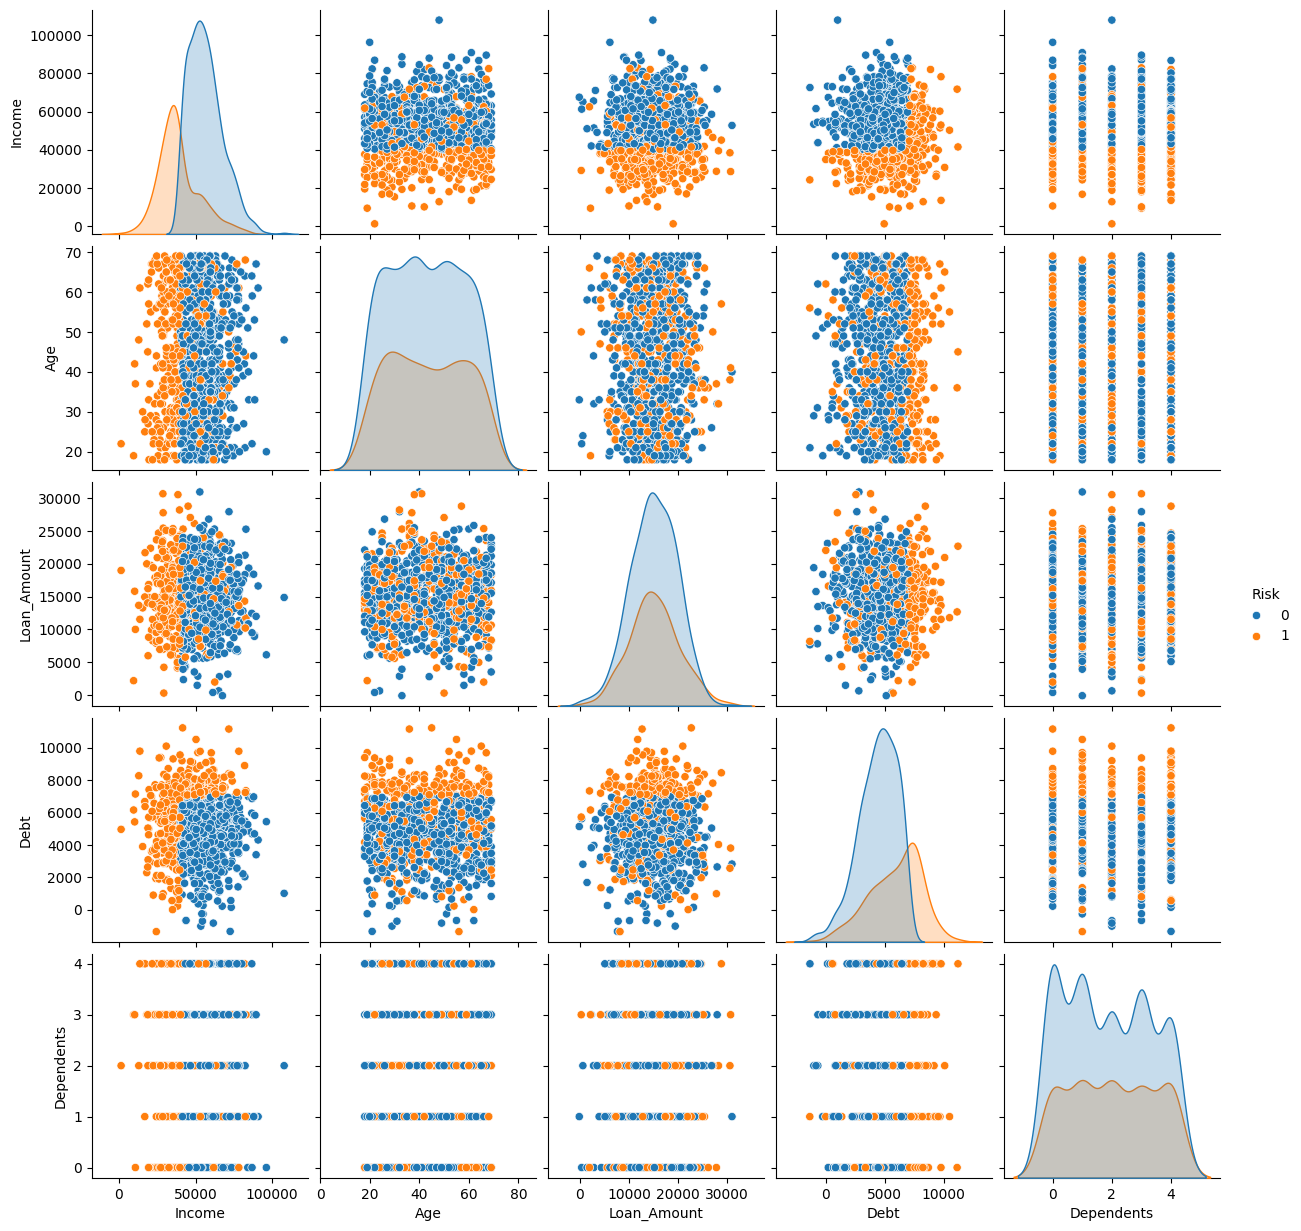

In [ ]:
# Summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistics of numerical columns
print("Basic statistics of numerical columns")
print(df.describe())

# Visualize correlations between numerical features
print("the visualization of the correlation between numerical features")
sns.pairplot(df, hue="Risk")
plt.show()

preprocessing the data

In [ ]:
# Fill missing values or drop rows with missing data
df = df.dropna()  # Drop rows with missing values


In [ ]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Credit_History', 'Employment_Status'], drop_first=True)

In [ ]:
scaler = StandardScaler()
numerical_features = ['Income', 'Age', 'Loan_Amount', 'Debt', 'Dependents']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
X = df.drop('Risk', axis=1)  # Features
y = df['Risk']  # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train machine learning mode

1 logistic regression

In [ ]:
# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate the model
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.855
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       133
           1       0.80      0.76      0.78        67

    accuracy                           0.85       200
   macro avg       0.84      0.83      0.84       200
weighted avg       0.85      0.85      0.85       200



2 random forest classifier

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.995
Random Forest Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       133
           1       1.00      0.99      0.99        67

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



evaluation the models

1 confusion matrix

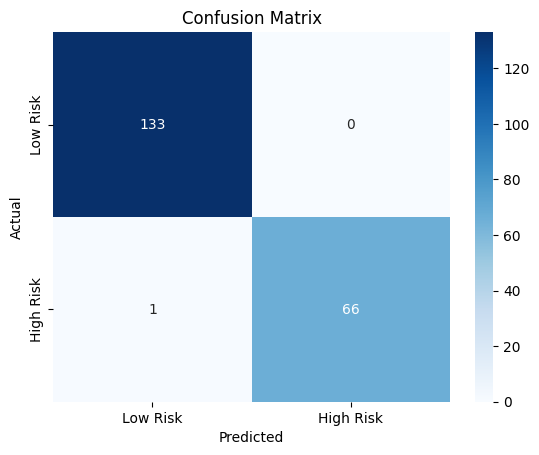

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


feature importance

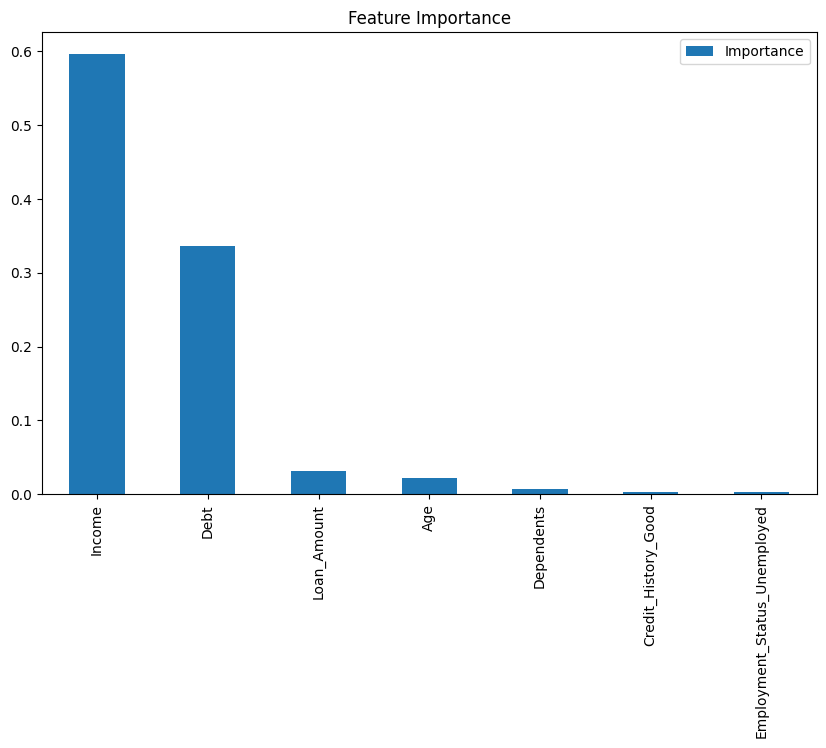

In [ ]:
# Display feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


In [ ]:
# Assuming you have your test set X_test and y_test
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on test data
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       133
           1       1.00      0.99      0.99        67

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
print(y_train.value_counts())  # Check the count of each class in the target variable


Risk
0    517
1    283
Name: count, dtype: int64


In [ ]:

from sklearn.model_selection import GridSearchCV

# Assuming X_train is your training data
scaler = StandardScaler()

# Fit the scaler to the numerical features of X_train
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])

# Hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from the grid search
rf_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


prediction of the credit scoring

In [ ]:
# Function to take user input
def get_user_input():
    print("Enter the following details for credit scoring prediction:")
    income = float(input("Annual Income (e.g., 50000): "))
    age = int(input("Age (e.g., 30): "))
    loan_amount = float(input("Loan Amount (e.g., 15000): "))
    debt = float(input("Debt-to-Income Ratio (e.g., 0.2): "))
    dependents = int(input("Number of Dependents (e.g., 2): "))
    credit_history = int(input("Credit History (1 for Good, 0 for Bad): "))
    employment_status = int(input("Employment Status (1 for Employed, 0 for Unemployed): "))

    # Create a dictionary for the input
    user_data = {
        'Income': income,
        'Age': age,
        'Loan_Amount': loan_amount,
        'Debt': debt,
        'Dependents': dependents,
        'Credit_History_1': credit_history,
        'Employment_Status_Employed': employment_status
    }

    # Convert to DataFrame
    return pd.DataFrame([user_data])

# Get user input
user_input_df = get_user_input()

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Income', 'Age', 'Loan_Amount', 'Debt', 'Dependents']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Ensure all expected columns are present
expected_features = X.columns
for col in expected_features:
    if col not in user_input_df.columns:
        user_input_df[col] = 0

# Reorder columns to match training data
user_input_df = user_input_df[expected_features]

# Scale numerical features in user input
user_input_df[numerical_columns] = scaler.transform(user_input_df[numerical_columns])

# Make prediction
prediction = rf_model.predict(user_input_df)
prediction_proba = rf_model.predict_proba(user_input_df)

# Display result
risk_level = "High Risk" if prediction[0] == 1 else "Low Risk"
print(f"\nPredicted Risk Level: {risk_level}")
print(f"Prediction Probabilities: Low Risk = {prediction_proba[0][0]:.2f}, High Risk = {prediction_proba[0][1]:.2f}")


Enter the following details for credit scoring prediction:
Annual Income (e.g., 50000): 10000
Age (e.g., 30): 59
Loan Amount (e.g., 15000): 10000
Debt-to-Income Ratio (e.g., 0.2): 0.1
Number of Dependents (e.g., 2): 7
Credit History (1 for Good, 0 for Bad): 0
Employment Status (1 for Employed, 0 for Unemployed): 0

Predicted Risk Level: Low Risk
Prediction Probabilities: Low Risk = 0.88, High Risk = 0.12


In [ ]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced')

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example expected features (adjust based on your model's training data)
expected_features = ['Income', 'Age', 'Loan_Amount', 'Debt', 'Dependents']

# Function to take user input
def get_user_input():
    print("Enter the following details for credit scoring prediction:")
    income = float(input("Annual Income (e.g., 50000): "))
    age = int(input("Age (e.g., 30): "))
    loan_amount = float(input("Loan Amount (e.g., 15000): "))
    debt = float(input("Debt-to-Income Ratio (e.g., 0.2): "))
    dependents = int(input("Number of Dependents (e.g., 2): "))
    credit_history = int(input("Credit History (1 for Good, 0 for Bad): "))
    employment_status = int(input("Employment Status (1 for Employed, 0 for Unemployed): "))

    # Create a dictionary for the input
    user_data = {
        'Income': income,
        'Age': age,
        'Loan_Amount': loan_amount,
        'Debt': debt,
        'Dependents': dependents,
        'Credit_History_1': credit_history,
        'Employment_Status_Employed': employment_status
    }

    # Convert to DataFrame
    return pd.DataFrame([user_data])

# Get user input
user_input_df = get_user_input()

# Align the user input data to the expected features used in model training
user_input_df = user_input_df[expected_features]

# If needed, add missing columns with default values
for col in expected_features:
    if col not in user_input_df.columns:
        user_input_df[col] = 0  # Default value if the column is missing

# Reorder columns to match the expected order
user_input_df = user_input_df[expected_features]

# Apply scaling to the numerical columns
numerical_columns = ['Income', 'Age', 'Loan_Amount', 'Debt', 'Dependents']
user_input_df[numerical_columns] = scaler.transform(user_input_df[numerical_columns])

# Now, you can make predictions
prediction = rf_model.predict(user_input_df)
prediction_proba = rf_model.predict_proba(user_input_df)

# Display result
risk_level = "High Risk" if prediction[0] == 1 else "Low Risk"
print(f"\nPredicted Risk Level: {risk_level}")
print(f"Prediction Probabilities: Low Risk = {prediction_proba[0][0]:.2f}, High Risk = {prediction_proba[0][1]:.2f}")


Enter the following details for credit scoring prediction:
Annual Income (e.g., 50000): 10000
Age (e.g., 30): 60
Loan Amount (e.g., 15000): 100000
Debt-to-Income Ratio (e.g., 0.2): 1.0
Number of Dependents (e.g., 2): 3
Credit History (1 for Good, 0 for Bad): 0
Employment Status (1 for Employed, 0 for Unemployed): 0

Predicted Risk Level: Low Risk
Prediction Probabilities: Low Risk = 0.92, High Risk = 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
